<img src="https://user-images.githubusercontent.com/4486578/60554111-8fc27400-9d79-11e9-9ca7-6d78ee89ea70.png" width=50% align=right>

<h1>AIBECS.jl</h1>

*The ideal tool for exploring global marine biogeochemical cycles*

**A**lgebraic **I**mplicit **B**iogeochemical **E**lemental **C**ycling **S**ystem

Check it on GitHub (look for [AIBECS.jl](https://github.com/briochemc/AIBECS.jl))

<img src="https://pbs.twimg.com/profile_images/1829321548/ess_logo_400x400.png" width=10% align=right>
<img src="https://user-images.githubusercontent.com/4486578/61599460-6d32c500-ac6c-11e9-9796-0b8892f0342d.png" width=10% align=left>

<center>A <b>Julia</b> package developed by <b>Benoît Pasquier</b> at the Department of Earth System Sciences, <b>UCI</b><br>with François Primeau and J. Keith Moore</center>

# Outline

1. Motivation and concept
1. Example 1: Radiocarbon
    1. Toy model circulation
    1. OCIM1
1. Example 2: Phosphorus cycle
1. AIBECS ecosystem

# Motivation: Starting from the AWESOME OCIM

<img src="https://camo.githubusercontent.com/d33ea29faf90a62526b971f0f95cd1f390a87d5d/687474703a2f2f7777772e6d74656c2e726f636b732f6d74656c2f617765736f6d654f43494d5f66696c65732f414f2532306c6f676f2e6a7067" width=25% align=right>

The AWESOME OCIM (for A Working Environment for Simulating Ocean Movement and Elemental cycling in an Ocean Circulation Inverse Model framework) by <span style="color:#cb3c33">**Seth John**</span> (USC)

Features: **GUI**, **simple to use**, **fast**, and **good circulation**<br>(thanks to the OCIM1 by <span style="color:#cb3c33">**Tim DeVries**</span> (UCSB))

# Motivation: comes the AIBECS

<img src="https://user-images.githubusercontent.com/4486578/60554111-8fc27400-9d79-11e9-9ca7-6d78ee89ea70.png" width=40% align=right>

Features (at present)

\- <span style="color:#389826">**simple to use**</span><br>
\- <span style="color:#389826">**fast**</span><br>
\- <span style="color:#389826">**Julia**</span> instead of MATLAB (free, open-source, better performance, and better syntax)<br>
\- <span style="color:#389826">**nonlinear**</span> systems<br>
\- <span style="color:#389826">**multiple tracers**</span><br>
\- <span style="color:#9558b2">**Parameter estimation/optimization**</span> and <span style="color:#9558b2">**Senstivity analysis**</span> (shameless plug: F-1 algorithm <span style="color:#9558b2">seminar tomorrow</span> at the School of Mathematics)<br>
\- <span style="color:#389826">**Other circulations**</span> (not just the OCIM)


<img src="https://user-images.githubusercontent.com/4486578/62023151-f4ef7500-b212-11e9-8fe5-8d67292790a5.gif" align=right width=20%>

# AIBECS Concept: a simple interface

To build a BGC model with the AIBECS, you just need to

**1.** Specify the <span style="color:#389826">**local sources and sinks**</span>

**2.** Chose the <span style="color:#4063d8">**ocean circulation**</span><br>

(**3.** Specify the <span style="color:#9558b2">**particle transport**</span>, if any)

<img src="https://user-images.githubusercontent.com/4486578/61757212-fe3ba480-ae02-11e9-8d17-d72866eaafb5.gif" width=40% align=right>

### Vectorization of the grid

The <span style="color:#4063d8">**3D ocean grid**</span> is rearranged<br>into a <span style="color:#4063d8">**1D column vector**</span>.

And **linear operators** are represented by <span style="color:#4063d8">**matrices**</span>.

<h1>Example 1: Radiocarbon, a tracer for water age</h1> 

<br>

<img src="https://wserv4.esc.cam.ac.uk/pastclimate/wp-content/uploads/2014/09/Radiocarbon-cycle_2.jpg" width=60% align=left>

*Image credit: Luke Skinner, University of Cambridge*




<h1>Tracer equation: <span style="color:#4063d8">transport</span> and <span style="color:#389826">sources and sinks</span></h1> 

The **Tracer equation**
    ($x=$ Radiocarbon concentration)

$$\frac{\partial x}{\partial t} + \color{RoyalBlue}{\nabla \cdot \left[ \boldsymbol{u} - \mathbf{K} \cdot \nabla \right]} x = \underbrace{\Lambda(x)}_{\textrm{air–sea exchange}} - \underbrace{x / \tau}_{\textrm{radioactive decay}}$$

becomes 

$$\frac{\partial \boldsymbol{x}}{\partial t} + \color{RoyalBlue}{\mathbf{T}} \, \boldsymbol{x} = \mathbf{\Lambda}(\boldsymbol{x}) - \boldsymbol{x} / \tau.$$

with the <span style="color:#4063d8">**transport matrix**</span>

# Translating to AIBECS Code is easy

To use AIBECS, we must recast each tracer equation,

$$\frac{\partial \boldsymbol{x}}{\partial t} + \color{RoyalBlue}{\mathbf{T}} \, \boldsymbol{x} = \color{ForestGreen}{\mathbf{\Lambda}(\boldsymbol{x}) - \boldsymbol{x} / \tau}$$

here, into the generic form:

$$\frac{\partial \boldsymbol{x}}{\partial t} + \color{RoyalBlue}{\mathbf{T}(\boldsymbol{p})} \, \boldsymbol{x} = \color{ForestGreen}{\boldsymbol{G}(\boldsymbol{x}, \boldsymbol{p})}$$

where $\boldsymbol{p} =$ vector of model parameters


# <span style="color:#4063d8">Circulation 1</span>: The 2×2×2 *Primeau* model

<img src="https://user-images.githubusercontent.com/4486578/58314610-3b130b80-7e53-11e9-9fe8-9527cdcca2d0.png" width=70% align=right>

\- **ACC**: Antarctic Circumpolar Current

\- **MOC**: Meridional Overturning Circulation

\- High-latitude mixing


(Credit: François Primeau, and Louis Primeau for the image)

Load the <span style="color:#4063d8">**circulation**</span> via `load`:

In [1]:
using AIBECS
wet3D, grd, T = Primeau_2x2x2.load();

Creating François Primeau's 2x2x2 model ✔


<img src="https://user-images.githubusercontent.com/4486578/61757362-946fca80-ae03-11e9-829c-2df22547582b.png" width=10% align=right>

`wet3D` is the mask of "wet" points

In [2]:
wet3D

2×2×2 BitArray{3}:
[:, :, 1] =
 true   true
 true  false

[:, :, 2] =
 true  false
 true  false

`grd` is the grid of the circulation

In [3]:
grd

OceanGrid of size 2×2×2 (lat×lon×depth)


<img src="https://user-images.githubusercontent.com/4486578/61757362-946fca80-ae03-11e9-829c-2df22547582b.png" width=10% align=right>
We can check the depth of the boxes arranged in 3D

In [4]:
grd.depth_3D

2×2×2 Array{Quantity{Float64,𝐋,Unitful.FreeUnits{(m,),𝐋,nothing}},3}:
[:, :, 1] =
 100.0 m  100.0 m
 100.0 m  100.0 m

[:, :, 2] =
 1950.0 m  1950.0 m
 1950.0 m  1950.0 m

<img src="https://user-images.githubusercontent.com/4486578/61774591-825d4e80-ae3a-11e9-9a1d-f76a53da7da9.png" width=30% align=right>

### The <span style="color:#4063d8">matrix $\mathbf{T}$</span> acts on the column vector

What does `T` look like?

In [5]:
T

5×5 SparseMatrixCSC{Float64,Int64} with 12 stored entries:
  [1, 1]  =  4.50923e-9
  [2, 1]  =  -5.88161e-10
  [3, 1]  =  -3.92107e-9
  [2, 2]  =  9.80268e-10
  [5, 2]  =  -5.60153e-11
  [1, 3]  =  -3.92107e-9
  [3, 3]  =  3.92107e-9
  [1, 4]  =  -5.88161e-10
  [4, 4]  =  3.36092e-11
  [2, 5]  =  -3.92107e-10
  [4, 5]  =  -3.36092e-11
  [5, 5]  =  5.60153e-11

A sparse matrix is indexed by its non-zero values,<br>
but we can check it out in full using `Matrix`:

In [6]:
Matrix(T)

5×5 Array{Float64,2}:
  4.50923e-9    0.0          -3.92107e-9  -5.88161e-10   0.0        
 -5.88161e-10   9.80268e-10   0.0          0.0          -3.92107e-10
 -3.92107e-9    0.0           3.92107e-9   0.0           0.0        
  0.0           0.0           0.0          3.36092e-11  -3.36092e-11
  0.0          -5.60153e-11   0.0          0.0           5.60153e-11

# <span style="color:#389826">Sources and sinks</span>

Tracer equation reminder:

$$\frac{\partial \boldsymbol{x}}{\partial t} + \mathbf{T}(\boldsymbol{p}) \, \boldsymbol{x} = \boldsymbol{G}(\boldsymbol{x}, \boldsymbol{p})$$

Let's write $\boldsymbol{G}(\boldsymbol{x}, \boldsymbol{p}) = \mathbf{\Lambda}(\boldsymbol{x}) - \boldsymbol{x} / \tau$

In [7]:
G(x,p) = Λ(x,p) - x / p.τ

G (generic function with 1 method)

## <span style="color:#389826">Air–sea gas exchange</span>

And define the air–sea gas exchange $\mathbf{\Lambda}(\boldsymbol{x}) = \frac{\lambda}{h} (R_\mathsf{atm} - \boldsymbol{x})$ at the surface with a piston velocity $\lambda$ over the top layer of height $h$

In [8]:
function Λ(x,p)
    Ratm, λ = p.Ratm, p.λ
    return λ / h * (Ratm .- x) .* (z .== z₀)
end

Λ (generic function with 1 method)

Define `h` the height of the top layer

In [9]:
h = grd.δdepth[1] |> ustrip

200

<img src="https://user-images.githubusercontent.com/4486578/61757212-fe3ba480-ae02-11e9-8d17-d72866eaafb5.gif" width=20% align=right>

Define `z` the depths in vector form.<br>
(`iwet` converts from 3D to 1D)

In [10]:
iwet = findall(wet3D)
z = grd.depth_3D[iwet] 

5-element Array{Quantity{Float64,𝐋,Unitful.FreeUnits{(m,),𝐋,nothing}},1}:
  100.0 m
  100.0 m
  100.0 m
 1950.0 m
 1950.0 m

Define `z₀` the depth of the top layer

In [11]:
z₀ = z[1]

100.0 m

So that `z .== z₀` is `true` at the surface layer

In [12]:
z .== z₀

5-element BitArray{1}:
  true
  true
  true
 false
 false

# <span style="color:#cb3c33">Model parameters</span>

First, create a table of parameters using the AIBECS API

In [13]:
t = empty_parameter_table()
add_parameter!(t,    :τ, 5730u"yr" / log(2)) # radioactive decay e-folding timescale
add_parameter!(t,    :λ,   50u"m" / 10u"yr") # piston velocity
add_parameter!(t, :Ratm,      1.0u"mol/m^3") # atmospheric concentration
t 

3×9 DataFrames.DataFrame. Omitted printing of 3 columns
│ Row │ symbol │ value      │ unit     │ printunit │ mean_obs │ variance_obs │
│     │ Symbol │ Float64    │ Unitful… │ Unitful…  │ Float64  │ Float64      │
├─────┼────────┼────────────┼──────────┼───────────┼──────────┼──────────────┤
│ 1   │ τ      │ 2.60875e11 │ s        │ yr        │ NaN      │ NaN          │
│ 2   │ λ      │ 1.5844e-7  │ m s^-1   │ m yr^-1   │ NaN      │ NaN          │
│ 3   │ Ratm   │ 1.0        │ mol m^-3 │ mol m^-3  │ NaN      │ NaN          │

Then, chose a name for the parameters (here `C14_parameters`), and create the vector `p`:

In [14]:
initialize_Parameters_type(t, "C14_parameters")
p = C14_parameters()   

     τ = 8.27e+03 [yr] (fixed)
     λ = 5.00e+00 [m yr⁻¹] (fixed)
  Ratm = 1.00e+00 [mol m⁻³] (fixed)


C14_parameters{Float64}


Note `p` has units! 

In AIBECS, you give your parameters units and they are <span style="color:#cb3c33">**automatically converted to SI units**</span> under the hood.

(And they are converted back for pretty printing!)

# <span style="color:#cb3c33">State function</span> (and <span style="color:#cb3c33"> Jacobian</span>)

$$\frac{\partial \boldsymbol{x}}{\partial t} = \boldsymbol{G}(\boldsymbol{x}, \boldsymbol{p}) - \mathbf{T}(\boldsymbol{p}) \, \boldsymbol{x} = \color{Brown}{\boldsymbol{F}(\boldsymbol{x}, \boldsymbol{p})}$$

We generate `F` and `∇ₓF` via

In [15]:
F, ∇ₓF = state_function_and_Jacobian(p -> T, G) ; 

## The <span style="color:#cb3c33">state function</span> `F(x,p)`

Let's try `F` on a random state vector `x`

In [16]:
x = rand(5)
F(x,p)

5-element Array{Float64,1}:
  7.413713419062574e-10
  1.2231787219589316e-9
  6.907979175820411e-10
 -5.130454172707937e-12
 -4.642434712246115e-11

##  The <span style="color:#cb3c33">Jacobian</span> `∇ₓF`

The Jacobian matrix is $\nabla_{\boldsymbol{x}}\boldsymbol{F}(\boldsymbol{x},\boldsymbol{p}) = \left[\frac{\partial F_i}{\partial x_j}\right]_{i,j}$, is useful for 
- **implicit** time-steps
- **solving** the **steady-state** system
- **optimization** / **uncertainty analysis**

With AIBECS, the **Jacobian** is <span style="color:#cb3c33">**computed automatically**</span> for you under the hood... using <span style="color:#cb3c33">**dual numbers**</span>!<br>
(Come to my Applied seminar tomorrow for more on dual numbers and... hyperdual numbers!)

Let's try `∇ₓF` at `x`:

In [17]:
Matrix(∇ₓF(x,p))

5×5 Array{Float64,2}:
 -5.30527e-9    0.0           3.92107e-9   5.88161e-10   0.0        
  5.88161e-10  -1.7763e-9     0.0          0.0           3.92107e-10
  3.92107e-9    0.0          -4.71711e-9   0.0           0.0        
  0.0           0.0           0.0         -3.74424e-11   3.36092e-11
  0.0           5.60153e-11   0.0          0.0          -5.98486e-11

# <span style="color:#cb3c33">Time stepping</span>

AIBECS provides schemes for time-stepping
- Euler forward
- Euler backward
- **Crank-Nicolson**
- Crank-Nicolson leap-frog

Let's track the evolution of `x` through time

Define a function to apply the time steps `n` times for a time span of `Δt` starting from `x₀`

In [18]:
function time_steps(x₀, Δt, n, F, ∇ₓF)
    x_hist = [x₀]
    δt = Δt / n
    for i in 1:n
        push!(x_hist, AIBECS.crank_nicolson_step(last(x_hist), p, δt, F, ∇ₓF))
    end
    return reduce(hcat, x_hist), 0:δt:Δt
end

time_steps (generic function with 1 method)

Let's run the model for 5000 years starting with `x = 1` everywhere:

In [19]:
Δt = 5000u"yr" |> u"s" |> ustrip
x₀ = ones(5)             
x_hist, t_hist = time_steps(x₀, Δt, 1000, F, ∇ₓF)  

([1.0 0.99943 … 0.940489 0.940485; 1.0 0.99943 … 0.954752 0.95475; … ; 1.0 0.999395 … 0.804853 0.804839; 1.0 0.999395 … 0.894027 0.894023], 0.0:1.57788e8:1.57788e11)

#### Plotting the output is easy

The radiocarbon age, `C14age`, is given by $\log(R_{\mathrm{atm}}/\boldsymbol{x}) \tau$ because $\boldsymbol{x}\sim R_{\mathrm{atm}} \exp(-t/\tau)$

Let's plot its evolution with time:

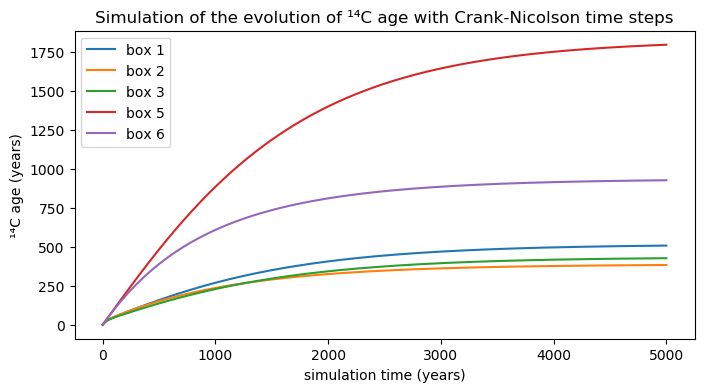

PyObject Text(0.5, 1, 'Simulation of the evolution of ¹⁴C age with Crank-Nicolson time steps')

In [20]:
using PyPlot, PyCall
C14age_hist = log.(p.Ratm ./ x_hist) * (p.τ * u"s" |> u"yr" |> ustrip)
figure(figsize=(8,4))
plot(t_hist .* 1u"s" .|> u"yr" .|> ustrip, C14age_hist')
xlabel("simulation time (years)")
ylabel("¹⁴C age (years)")
legend("box " .* string.(findall(vec(wet3D))))
title("Simulation of the evolution of ¹⁴C age with Crank-Nicolson time steps")

# <span style="color:#cb3c33">Solve directly for the steady state</span>

Instead, we can directly solve for the **steady-state**, $\boldsymbol{s}$,<br>
(using `CTKAlg()`, a quasi-Newton root-finding algorithm from C. T. Kelley)

i.e., such that $\boldsymbol{F}(\boldsymbol{s},\boldsymbol{p}) = 0$:

In [21]:
prob = SteadyStateProblem(F, ∇ₓF, x, p)
s = solve(prob, CTKAlg()).u

5-element Array{Float64,1}:
 0.9395557449765634
 0.9542341322419013
 0.9489433863241392
 0.8016816657976087
 0.8931162915594035

gives the age

In [22]:
log.(p.Ratm ./ s) * (p.τ * u"s" |> u"yr")

5-element Array{Quantity{Float64,𝐓,Unitful.FreeUnits{(yr,),𝐓,nothing}},1}:
  515.4096830423198 yr
  387.2609241614582 yr
  433.2228144719123 yr
 1827.2890596434538 yr
  934.4487196556565 yr

# 35'000 years without the steady-state solver!

How long would it take to reach that steady-state with time-stepping?

We chan check by tracking the norm of `F(x,p)`:

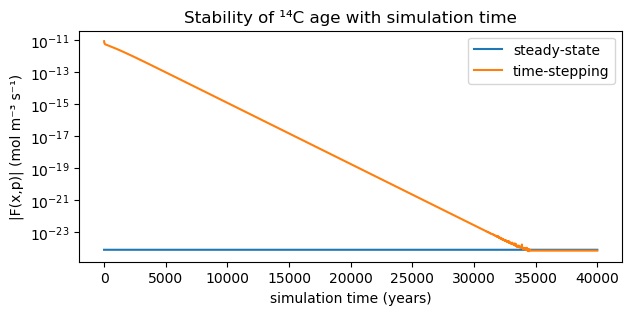

PyObject Text(0.5, 1, 'Stability of ¹⁴C age with simulation time')

In [23]:
using LinearAlgebra
Δt = 40000u"yr" |> u"s" |> ustrip
x_hist, t_hist = time_steps(x₀, Δt, 4000, F, ∇ₓF)
figure(figsize=(7,3))
semilogy(t_hist .* 1u"s" .|> u"yr" .|> ustrip, [norm(F(s,p)) for i in 1:size(x_hist,2)], label="steady-state")
semilogy(t_hist .* 1u"s" .|> u"yr" .|> ustrip, [norm(F(x_hist[:,i],p)) for i in 1:size(x_hist,2)], label="time-stepping")
xlabel("simulation time (years)"); ylabel("|F(x,p)| (mol m⁻³ s⁻¹)"); legend(); title("Stability of ¹⁴C age with simulation time")

# <span style="color:#4063d8">Circulation 2</span>: OCIM1

The Ocean Circulation Inverse Model (OCIM) version 1 is loaded via

In [24]:
wet3D, grd, T = OCIM1.load() ;

Loading OCIM1 ✔


┌ Info: You are about to use OCIM1 model.
│ If you use it for research, please cite:
│ 
│ - DeVries, T., 2014: The oceanic anthropogenic CO2 sink: Storage, air‐sea fluxes, and transports over the industrial era, Global Biogeochem. Cycles, 28, 631–647, doi:10.1002/2013GB004739.
│ - DeVries, T. and F. Primeau, 2011: Dynamically and Observationally Constrained Estimates of Water-Mass Distributions and Ages in the Global Ocean. J. Phys. Oceanogr., 41, 2381–2401, doi:10.1175/JPO-D-10-05011.1
│ 
│ You can find the corresponding BibTeX entries in the CITATION.bib file
│ at the root of the AIBECS.jl package repository.
│ (Look for the "DeVries_Primeau_2011" and "DeVries_2014" keys.)
└ @ AIBECS.OCIM1 /Users/benoitpasquier/.julia/dev/AIBECS/src/OCIM1.jl:53


Redefine `F` and `∇ₓF` for the new `T`:

In [25]:
F, ∇ₓF = state_function_and_Jacobian(p -> T, G) ;

Redefine `iwet` and `x` for the new grid size

In [26]:
iwet = findall(wet3D)
x = ones(length(iwet))

200160-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

Redefine `h`, `z₀`, and `z` for the new grid

In [27]:
h = grd.δdepth[1] |> ustrip
z = grd.depth_3D[iwet]
z₀ = z[1]

18.0675569520817 m

Solve for the steady-state of radio carbon and convert to age

In [28]:
prob = SteadyStateProblem(F, ∇ₓF, x, p)
s = solve(prob, CTKAlg()).u 
C14age = log.(p.Ratm ./ s) * p.τ * u"s" .|> u"yr"

200160-element Array{Quantity{Float64,𝐓,Unitful.FreeUnits{(yr,),𝐓,nothing}},1}:
 1364.7245332141904 yr
 1376.8840164693377 yr
  1395.880072599861 yr
 1383.0420964666034 yr
 1300.9081458733074 yr
 1277.2701118588532 yr
 1304.3367306286561 yr
  1288.118038954236 yr
  1247.320711595564 yr
 1190.1083953526847 yr
  1138.219050291774 yr
 1101.7243454552279 yr
 1049.2576207122263 yr
                     ⋮
 1117.4712399943664 yr
  1114.907399656483 yr
 1120.6568745437007 yr
 1114.5505967309834 yr
 1107.5809181397601 yr
 1123.3995401256584 yr
 1119.1390345237028 yr
  1111.881056087309 yr
 1097.5315397930838 yr
 1118.1355949317388 yr
  1114.114095931889 yr
 1109.1001449651774 yr

And plot horizontal slices using GR and Interact:

In [29]:
using GR, Interact
lon, lat = grd.lon |> ustrip, grd.lat |> ustrip
function horizontal_slice(x, levels, title)
    x_3D = fill(NaN, size(grd))
    x_3D[iwet] .= x .|> ustrip
    GR.figure(figsize=(10,5))
    @manipulate for iz in 1:size(grd)[3]
        GR.xlim([0,360])
        GR.title(string(title, " at $(AIBECS.round(grd.depth[iz])) depth"))
        GR.contourf(lon, lat, x_3D[:,:,iz]', levels=levels)
    end
end  
horizontal_slice(C14age, 0:100:2400, "14C age [yr] using the OCIM1 circulation")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17260368819679452751\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16633022398105752818\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17260368819679452751\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Warning: Accessing `scope.id` is deprecated, use `scopeid(scope)` instead.
│   caller = ip:0x0
└ @ Core :-1


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["iz"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
12, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"6805621057839031730\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"6805621057839031730\",\"id\":\"ob_01\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for 

Or zonal slices:

In [30]:
function zonal_slice(x, levels, title)
    x_3D = fill(NaN, size(grd))
    x_3D[iwet] .= x .|> ustrip
    GR.figure(figsize=(10,5))
    @manipulate for longitude in (grd.lon .|> ustrip)
        GR.title(string(title, " at $(round(longitude))°"))
        ilon = findfirst(ustrip.(grd.lon) .== longitude)
        GR.contourf(lat, reverse(-grd.depth .|> ustrip), reverse(x_3D[:,ilon,:], dims=2), levels=levels)
    end
end  
zonal_slice(C14age, 0:100:2400, "14C age [yr] using the OCIM1 circulation")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["longitude"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>180,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
90, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"3.0\",\"5.0\",\"7.0\",\"9.0\",\"11.0\",\"13.0\",\"15.0\",\"17.0\",\"19.0\",\"21.0\",\"23.0\",\"25.0\",\"27.0\",\"29.0\",\"31.0\",\"33.0\",\"35.0\",\"37.0\",\"39.0\",\"41.0\",\"43.0\",\"45.0\",\"47.0\",\"49.0\",\"51.0\",\"53.0\",\"55.0\",\"57.0\",\"59.0\",\"61.0\",\"63.0\",\"65.0\",\"67.0\",\"69.0\",\"71.0\",\"73.0\",\"75.0\",\"77.0\",\"79.0\",\"81.0\",\"83.0\",\"85.0\",\"87.0\",\"89.0\",\"91.0\",\"93.0\",\"95.0\",\"97.0\",\"99.0\",\"101.0\",\"103.0\",\

<img src="https://user-images.githubusercontent.com/4486578/62021873-e9994b00-b20c-11e9-88eb-adf892d7ecad.gif" width=20% align=right>

<h1>Example 2: A phosphorus cycle</h1> 

Dissolved inorganic phosphrous (<span style="color:#4063d8">**DIP**</span>)<br>
(transported by the <span style="color:#4063d8">**ocean circulation**</span>)

$$\left[\frac{\partial}{\partial t} + \color{RoyalBlue}{\nabla \cdot (\boldsymbol{u} + \mathbf{K}\cdot\nabla )}\right] x_\mathsf{DIP} = \color{forestgreen}{-U(x_\mathsf{DIP}) + R(x_\mathsf{POP})},$$

and particulate organic phosphrous (<span style="color:#9558b2">**POP**</span>)<br>
(transported by <span style="color:#9558b2">**sinking particles**</span>)


$$\left[\frac{\partial}{\partial t} + \color{DarkOrchid}{\nabla \cdot \boldsymbol{w}}\right] x_\mathsf{POP} = \color{forestgreen}{U(x_\mathsf{DIP}) - R(x_\mathsf{POP})}.$$

## <span style="color:#4063d8">Ocean circulation</span>

For DIP, the <span style="color:#4063d8">**advective–eddy-diffusive transport**</span> operator, $\nabla \cdot (\boldsymbol{u} + \mathbf{K}\cdot\nabla)$, is converted into the matrix `T`:

In [31]:
T_DIP(p) = T

T_DIP (generic function with 1 method)

## <span style="color:#9558b2">Sinking particles</span>

For POP, the <span style="color:#9558b2">**particle flux divergence (PFD)**</span> operator, $\nabla \cdot \boldsymbol{w}$, is created via `buildPFD`:

In [32]:
T_POP(p) = buildPFD(grd, wet3D, sinking_speed = w(p))

T_POP (generic function with 1 method)

The settling velocity, `w(p)`, is assumed linearly increasing with depth `z` to yield a "Martin curve profile"

In [33]:
w(p) = p.w₀ .+ p.w′ * (z .|> ustrip)

w (generic function with 1 method)

## <span style="color:#389826">Local sources and sinks</span>

### Uptake:
$$\frac{1}{τ} \, \frac{\boldsymbol{x}_\mathrm{DIP}^2}{\boldsymbol{x}_\mathrm{DIP} + k}$$

In [34]:
relu(x) = (x .≥ 0) .* x
zₑ = 80u"m"    # depth of the euphotic zone
function uptake(DIP, p)
    τ, k = p.τ, p.k
    DIP⁺ = relu(DIP)
    return 1/τ * DIP⁺.^2 ./ (DIP⁺ .+ k) .* (z .≤ zₑ)
end

uptake (generic function with 1 method)

## <span style="color:#389826">Local sources and sinks</span>

### Remineralization:
$$\kappa \, \boldsymbol{x}_\mathrm{POP}$$

In [35]:
remineralization(POP, p) = p.κ * POP

remineralization (generic function with 1 method)

## <span style="color:#389826">Local sources and sinks</span>

### "Geological" restoring
$$\frac{x_\mathrm{geo} - \boldsymbol{x}_\mathrm{DIP}}{\tau_\mathrm{geo}}$$

In [36]:
geores(x, p) = (p.xgeo .- x) / p.τgeo

geores (generic function with 1 method)

## <span style="color:#389826">Local sources and sinks</span>

### Net sum of local sources and sinks

In [37]:
G_DIP(DIP, POP, p) = -uptake(DIP, p) + remineralization(POP, p) + geores(DIP, p)
G_POP(DIP, POP, p) =  uptake(DIP, p) - remineralization(POP, p)

G_POP (generic function with 1 method)

## <span style="color:#cb3c33">Parameters</span>

In [38]:
t = empty_parameter_table()    # empty table of parameters
add_parameter!(t, :xgeo, 2.12u"mmol/m^3")
add_parameter!(t, :τgeo, 1.0u"Myr")
add_parameter!(t, :k, 6.62u"μmol/m^3")
add_parameter!(t, :w₀, 0.64u"m/d")
add_parameter!(t, :w′, 0.13u"1/d")
add_parameter!(t, :κ, 0.19u"1/d")
add_parameter!(t, :τ, 236.52u"d")
initialize_Parameters_type(t, "Pcycle_Parameters")   # Generate the parameter type
p = Pcycle_Parameters()

  xgeo = 2.12e+00 [mmol m⁻³] (fixed)
  τgeo = 1.00e+00 [Myr] (fixed)
     k = 6.62e+00 [μmol m⁻³] (fixed)
    w₀ = 6.40e-01 [m d⁻¹] (fixed)
    w′ = 1.30e-01 [d⁻¹] (fixed)
     κ = 1.90e-01 [d⁻¹] (fixed)
     τ = 2.37e+02 [d] (fixed)


Pcycle_Parameters{Float64}


# <span style="color:#cb3c33">State function `F`</span> and <span style="color:#cb3c33">Jacobian `∇ₓF`</span>

In [39]:
nb = length(iwet); x = ones(2nb)
F, ∇ₓF = state_function_and_Jacobian((T_DIP,T_POP), (G_DIP,G_POP), nb) ;

Solve the steady-state PDE system

In [40]:
prob = SteadyStateProblem(F, ∇ₓF, x, p)
s = solve(prob, CTKAlg(), preprint=" ").u

 (No initial Jacobian factors fed to Newton solver)
 Solving F(x) = 0 (using Shamanskii Method)
 │   iteration     |F(x)|   |δx|/|x|   Jac age   fac age
 │       0        2.1e-03                               
 │       1        2.2e-11    1.0e+00        1         1    
 │       2        1.9e-12    8.8e-05        2         2    
 │       3        1.7e-13    5.9e-06        3         3    
 │       4        1.5e-14    5.1e-07        4         4    
 │       5        1.3e-15    4.5e-08        5         5    
 │       6        1.1e-16    4.0e-09        6         6    
 │       7        1.0e-17    3.6e-10        7         7    
 │       8        9.0e-19    3.3e-11        8         8    
 │       9        7.9e-20    8.3e-11        9         9    
 │      10        1.4e-20    1.8e-10       10        10    
 └─> Newton has converged, |x|/|F(x)| = 2e+12 years


400320-element Array{Float64,1}:
 0.0022918000196414847 
 0.0023267961206642233 
 0.0023734804749427373 
 0.002304733852051089  
 0.0018232975203173387 
 0.001664249446643027  
 0.0017612887181736394 
 0.0017580441190724562 
 0.0016317593482869722 
 0.0014767294268767895 
 0.0014783166432202747 
 0.0015108461826535248 
 0.0014186135301239304 
 ⋮                     
 4.0121274628911697e-10
 4.3125194068535553e-10
 4.067095785677626e-10 
 3.675952791415583e-10 
 5.806135370138764e-10 
 4.0883199818241757e-10
 3.655906483583464e-10 
 3.9472816888048146e-10
 5.575236549516896e-10 
 3.911246732959228e-10 
 4.139874087334214e-10 
 4.826616420108829e-10 

Plot DIP

In [41]:
DIP, POP = state_to_tracers(s, nb, 2)
DIP_unit = u"mmol/m^3"
horizontal_slice(DIP * u"mol/m^3" .|> DIP_unit, 0:0.3:3, "P-cycle model: DIP [mmol m^{-3}]")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["iz"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
12, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"11975178476012208499\",\"id\":\"ob_19\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"11975178476012208499\",\"id\":\"ob_18\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        fo

Plot POP

In [42]:
zonal_slice(POP .|> relu .|> log10, -10:1:10, "P-cycle model: POP [log\\(mol m^{-3}\\)]")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["longitude"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>180,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
90, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"3.0\",\"5.0\",\"7.0\",\"9.0\",\"11.0\",\"13.0\",\"15.0\",\"17.0\",\"19.0\",\"21.0\",\"23.0\",\"25.0\",\"27.0\",\"29.0\",\"31.0\",\"33.0\",\"35.0\",\"37.0\",\"39.0\",\"41.0\",\"43.0\",\"45.0\",\"47.0\",\"49.0\",\"51.0\",\"53.0\",\"55.0\",\"57.0\",\"59.0\",\"61.0\",\"63.0\",\"65.0\",\"67.0\",\"69.0\",\"71.0\",\"73.0\",\"75.0\",\"77.0\",\"79.0\",\"81.0\",\"83.0\",\"85.0\",\"87.0\",\"89.0\",\"91.0\",\"93.0\",\"95.0\",\"97.0\",\"99.0\",\"101.0\",\"103.0\",\

We can also make publication-quality plots using Python's Cartopy

In [43]:
ccrs = pyimport("cartopy.crs")
cfeature = pyimport("cartopy.feature")
lon_cyc = [lon; 360+lon[1]]
DIP_3D = fill(NaN, size(grd)); DIP_3D[iwet] = DIP * u"mol/m^3" .|> u"mmol/m^3" .|> ustrip
DIP_3D_cyc = cat(DIP_3D, DIP_3D[:,[1],:], dims=2)
f1 = PyPlot.figure(figsize=(12,5))
@manipulate for iz in 1:24
    withfig(f1, clear=true) do
        ax = PyPlot.subplot(projection = ccrs.EqualEarth(central_longitude=-155.0))
        ax.add_feature(cfeature.COASTLINE, edgecolor="#000000") # black coast lines
        ax.add_feature(cfeature.LAND, facecolor="#CCCCCC")      # gray land
        plt = PyPlot.contourf(lon_cyc, lat, DIP_3D_cyc[:,:,iz], levels=0:0.1:3.5, 
            transform=ccrs.PlateCarree(), zorder=-1, extend="both")
        plt2 = PyPlot.contour(plt, lon_cyc, lat, DIP_3D_cyc[:,:,iz], levels=plt.levels[1:5:end], 
            transform=ccrs.PlateCarree(), zorder=0, extend="both", colors="k")
        ax.clabel(plt2, fmt="%2.1f", colors="k", fontsize=14)
        cbar = PyPlot.colorbar(plt, orientation="vertical", extend="both", ticks=plt2.levels)
        cbar.add_lines(plt2)
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label(label="mmol / m³", fontsize=16)
        title("Publication-quality DIP with Cartopy; depth = $(string(round(typeof(1u"m"),grd.depth[iz])))", fontsize=20)
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["iz"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
12, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/benoitpasquier/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Users/benoitpasquier/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"14906745784360972561\",\"id\":\"ob_36\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"14906745784360972561\",\"id\":\"ob_35\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        fo

<img src="https://user-images.githubusercontent.com/4486578/61606237-9a8f6b00-ac8c-11e9-8aa7-1267ab0f911a.png" width=90%>